In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d yugansh121/traffic-sign-datasets

100% 1.37G/1.37G [01:15<00:00, 23.1MB/s]
100% 1.37G/1.37G [01:15<00:00, 19.4MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/traffic-sign-datasets.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [9]:
data=[]

In [8]:
indian_folder=os.listdir('/content/Indian Traffic Signs Prediction(85 classes)/Indian Traffic Signs Prediction(85 classes)/train')
print(indian_folder)
print(len(indian_folder))

['SPEED_LIMIT_70', 'PEDESTRIAN_CROSSING', 'NO_STOPPING_OR_STANDING', 'SPEED_LIMIT_40', 'HORN_PROHIBITED', 'NO_ENTRY', 'HUMP_OR_ROUGH_ROAD', 'CROSS_ROAD', 'LEFT_TURN_PROHIBITED', 'GAP_IN_MEDIAN', 'SPEED_LIMIT_80', 'SPEED_LIMIT_60', 'SPEED_LIMIT_50', 'COMPULSARY_KEEP_RIGHT', 'SPEED_LIMIT_30']
15


In [10]:
for i in range(15):
  folder_path='/content/Indian Traffic Signs Prediction(85 classes)/Indian Traffic Signs Prediction(85 classes)/train/'+indian_folder[i]
  img_folder=os.listdir(folder_path)
  l=len(img_folder)
  for j in range(l):
    img_path=folder_path+'/'+img_folder[j]
    img_pillow=Image.open(img_path)
    img_color=img_pillow.convert('RGB')
    img_resize=img_color.resize((64,64))
    img_arr=np.array(img_resize)
    data.append([img_arr,indian_folder[i]])

In [14]:
persian_folder=os.listdir('/content/Persian Traffic Sign Dataset (PTSD)/Persian Traffic Sign Dataset (PTSD)/train')
print(persian_folder)
print(len(persian_folder))

['No Entry', 'Compulsory Keep BothSide', 'Pedestrain', 'Right Margin', 'Compulsory Keep Right', 'One way Traffic', 'Cycle crossing', 'NO Stopping', 'Maximum Speed 30', 'Danger', 'Roundabouts', 'Right Turn Prohibited']
12


In [15]:
for i in range(12):
  folder_path='/content/Persian Traffic Sign Dataset (PTSD)/Persian Traffic Sign Dataset (PTSD)/train/'+persian_folder[i]
  img_folder=os.listdir(folder_path)
  l=len(img_folder)
  for j in range(l):
    img_path=folder_path+'/'+img_folder[j]
    img_pillow=Image.open(img_path)
    img_color=img_pillow.convert('RGB')
    img_resize=img_color.resize((64,64))
    img_arr=np.array(img_resize)
    data.append([img_arr,persian_folder[i]])

In [16]:
len(data)

10573

In [17]:
x=[]
y=[]
for img,label in data:
  x.append(img)
  y.append(label)

In [18]:
x=np.array(x)
y=np.array(y)

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [23]:
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


In [24]:
y_encoded=encoder.inverse_transform(np.unique(y))

In [25]:
print(y_encoded)

['COMPULSARY_KEEP_RIGHT' 'CROSS_ROAD' 'Compulsory Keep BothSide'
 'Compulsory Keep Right' 'Cycle crossing' 'Danger' 'GAP_IN_MEDIAN'
 'HORN_PROHIBITED' 'HUMP_OR_ROUGH_ROAD' 'LEFT_TURN_PROHIBITED'
 'Maximum Speed 30' 'NO Stopping' 'NO_ENTRY' 'NO_STOPPING_OR_STANDING'
 'No Entry' 'One way Traffic' 'PEDESTRIAN_CROSSING' 'Pedestrain'
 'Right Margin' 'Right Turn Prohibited' 'Roundabouts' 'SPEED_LIMIT_30'
 'SPEED_LIMIT_40' 'SPEED_LIMIT_50' 'SPEED_LIMIT_60' 'SPEED_LIMIT_70'
 'SPEED_LIMIT_80']


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [27]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
num_of_classes=27
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [30]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(x_train_scaled,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
268/268 [==============================] - 2s 8ms/step - loss: 0.3649 - accuracy: 0.8720 - val_loss: 0.2584 - val_accuracy: 0.9422
Epoch 2/50
268/268 [==============================] - 2s 8ms/step - loss: 0.3529 - accuracy: 0.8790 - val_loss: 0.2786 - val_accuracy: 0.9422
Epoch 3/50
268/268 [==============================] - 2s 7ms/step - loss: 0.3667 - accuracy: 0.8734 - val_loss: 0.2684 - val_accuracy: 0.9349
Epoch 4/50
268/268 [==============================] - 2s 7ms/step - loss: 0.3404 - accuracy: 0.8837 - val_loss: 0.2874 - val_accuracy: 0.9349
Epoch 5/50
268/268 [==============================] - 2s 6ms/step - loss: 0.3448 - accuracy: 0.8803 - val_loss: 0.2596 - val_accuracy: 0.9401
Epoch 6/50
268/268 [==============================] - 2s 6ms/step - loss: 0.3260 - accuracy: 0.8837 - val_loss: 0.2674 - val_accuracy: 0.9359
Epoch 7/50
268/268 [==============================] - 2s 6ms/step - loss: 0.3345 - accuracy: 0.8832 - val_loss: 0.2585 - val_accuracy: 0.9328
Epoch 

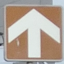

1/1 [==============================] - 0s 19ms/step
The Traffic Sign is One way Traffic


In [40]:
img_path='/content/Persian Traffic Sign Dataset (PTSD)/Persian Traffic Sign Dataset (PTSD)/train/One way Traffic/22_00001.jpg'
img_pillow=Image.open(img_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((64,64))
img_arr=np.array(img_resize)
cv2_imshow(img_arr)
img_scaled=img_arr/255
img_reshaped=np.reshape(img_scaled,[1,64,64,3])
prediction=model.predict(img_reshaped)
output=np.argmax(prediction)
if(output==0):
  print('The Traffic Sign is COMPULSARY_KEEP_RIGHT')
elif(output==1):
  print('The Traffic Sign is CROSS_ROAD')
elif(output==2):
  print('The Traffic Sign is Compulsory Keep BothSide')
elif(output==3):
  print('The Traffic Sign is Compulsory Keep Right')
elif(output==4):
  print('The Traffic Sign is Cycle crossing')
elif(output==5):
  print('The Traffic Sign is Danger')
elif(output==6):
  print('The Traffic Sign is GAP_IN_MEDIAN')
elif(output==7):
  print('The Traffic Sign is HORN_PROHIBITED')
elif(output==8):
  print('The Traffic Sign is HUMP_OR_ROUGH_ROAD')
elif(output==9):
  print('The Traffic Sign is LEFT_TURN_PROHIBITED')
elif(output==10):
  print('The Traffic Sign is Maximum Speed 30')
elif(output==11):
  print('The Traffic Sign is NO Stopping')
elif(output==12):
  print('The Traffic Sign is NO_ENTRY')
elif(output==13):
  print('The Traffic Sign is NO_STOPPING_OR_STANDING')
elif(output==14):
  print('The Traffic Sign is No Entry')
elif(output==15):
  print('The Traffic Sign is One way Traffic')
elif(output==16):
  print('The Traffic Sign is PEDESTRIAN_CROSSING')
elif(output==17):
  print('The Traffic Sign is Pedestrain')
elif(output==18):
  print('The Traffic Sign is Right Margin')
elif(output==19):
  print('The Traffic Sign is Right Turn Prohibited')
elif(output==20):
  print('The Traffic Sign is Roundabouts')
elif(output==21):
  print('The Traffic Sign is SPEED_LIMIT_30')
elif(output==22):
  print('The Traffic Sign is SPEED_LIMIT_40')
elif(output==23):
  print('The Traffic Sign is SPEED_LIMIT_50')
elif(output==24):
  print('The Traffic Sign is SPEED_LIMIT_60')
elif(output==25):
  print('The Traffic Sign is SPEED_LIMIT_70')
elif(output==26):
  print('The Traffic Sign is SPEED_LIMIT_80')